<h1 style="color:black; font-size:300%">DATA CLEANING WITH PYTHON</h1> 

<h2 style= "color:black; font-size:392%"> NUMBER OF <b style="color:red">CANCER</b> SURGERIES PERFORMED IN CALIFORNIA HOSPITALS    FROM 2013 TO 2020 </h2>


<h3 style="color:black; font-size:300%">BACKGROUND</h3> 


<b style="font-size:200%"> The dataset used for this ANALYSIS was obtained from <a href="
https://data.chhs.ca.gov/dataset/number-of-cancer-surgeries-volume-performed-in-california-hospitals">data.chhs.ca.gov</a> </b>








Citation:  	HCAI Patient Discharge Data and Ambulatory Surgery Data (for breast cancer only), 2013 - 2019




<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 40px;
              color:white;">
IMPORT RELEVANT LIBRARIES
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">
READ DATASET
</p>

In [2]:
data=pd.read_csv("../input/cancer-analysis/ca-oshpd-cancer-surgeries-gachospitals-20132020.csv", encoding="unicode_escape")
data

,Year,County,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LONGITUDE,LATITUDE
0,2013,NaN,Statewide,NaN,Colon,7128.0,NaN,NaN,NaN
1,2013,NaN,Statewide,NaN,Bladder,892.0,NaN,NaN,NaN
2,2013,NaN,Statewide,NaN,Rectum,2128.0,NaN,NaN,NaN
3,2013,NaN,Statewide,NaN,Breast,25829.0,NaN,NaN,NaN
4,2013,NaN,Statewide,NaN,Brain,2719.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,106580996.0,Rectum,NaN,6.0,-121.593602,39.138805
15695,2020,Yuba,Adventist Health and Rideout,106580996.0,Prostate,NaN,5.0,-121.593602,39.138805
15696,2020,Yuba,Adventist Health and Rideout,106580996.0,Lung,NaN,8.0,-121.593602,39.138805
15697,2020,Yuba,Adventist Health and Rideout,106580996.0,Colon,NaN,20.0,-121.593602,39.138805


 <h1 style="color:blue"; font-size:100%">INSPECT DATA:</h1> 
    
 <h2 style="color:blue; font-size:150%">Dataset Dimension, Size, Numerical Summary and Dataset Column Type:</h2>

In [3]:
print("This is the shape of the data: ", data.shape)


This is the shape of the data:  (15699, 9)


In [4]:
# Dataset column type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15699 entries, 0 to 15698
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 15699 non-null  int64  
 1   County               15611 non-null  object 
 2   Hospital             15699 non-null  object 
 3   OSHPDID              15611 non-null  float64
 4   Surgery              15699 non-null  object 
 5   # of Cases (ICD 9)   5729 non-null   float64
 6   # of Cases (ICD 10)  9970 non-null   float64
 7   LONGITUDE            15604 non-null  float64
 8   LATITUDE             15604 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB


 <h1 style="color:red"; font-size:100%">DATA CLEANING AND MANIPULATION:</h1>

In [5]:
# check for names of columns
data.columns

Index(['Year', 'County', 'Hospital', 'OSHPDID', 'Surgery',
       '# of Cases (ICD 9)', '# of Cases (ICD 10)', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">
INSIGHT:Some of the columns have have to be renamed to avoid ambiquity during analysis
</p>

In [6]:
data=data.rename(columns={"OSHPDID":"OSHPD_ID", "# of Cases (ICD 9)":"No_of_cases1", "# of Cases (ICD 10)":"No_of_cases2"})
data

,Year,County,Hospital,OSHPD_ID,Surgery,No_of_cases1,No_of_cases2,LONGITUDE,LATITUDE
0,2013,NaN,Statewide,NaN,Colon,7128.0,NaN,NaN,NaN
1,2013,NaN,Statewide,NaN,Bladder,892.0,NaN,NaN,NaN
2,2013,NaN,Statewide,NaN,Rectum,2128.0,NaN,NaN,NaN
3,2013,NaN,Statewide,NaN,Breast,25829.0,NaN,NaN,NaN
4,2013,NaN,Statewide,NaN,Brain,2719.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,106580996.0,Rectum,NaN,6.0,-121.593602,39.138805
15695,2020,Yuba,Adventist Health and Rideout,106580996.0,Prostate,NaN,5.0,-121.593602,39.138805
15696,2020,Yuba,Adventist Health and Rideout,106580996.0,Lung,NaN,8.0,-121.593602,39.138805
15697,2020,Yuba,Adventist Health and Rideout,106580996.0,Colon,NaN,20.0,-121.593602,39.138805


In [7]:
data.dtypes

Year              int64
County           object
Hospital         object
OSHPD_ID        float64
Surgery          object
No_of_cases1    float64
No_of_cases2    float64
LONGITUDE       float64
LATITUDE        float64
dtype: object

<h1 style="color:blue; font-size:150%">
As we can see the string data in the dataframe are in the form of object, we need to convert them back to string to work on them:</h1>


In [8]:
string_col = data.select_dtypes(include="object").columns
data[string_col]=data[string_col].astype("string")
data.dtypes

Year              int64
County           string
Hospital         string
OSHPD_ID        float64
Surgery          string
No_of_cases1    float64
No_of_cases2    float64
LONGITUDE       float64
LATITUDE        float64
dtype: object

In [9]:
# Getting the categorical columns 
string_col=data.select_dtypes("string").columns.to_list()
string_col

['County', 'Hospital', 'Surgery']

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,15699.0,2.016505e+03,2.279133,2.013000e+03,2.014000e+03,2.017000e+03,2.018000e+03,2.020000e+03
OSHPD_ID,15611.0,1.062828e+08,134355.051779,1.060107e+08,1.061904e+08,1.063013e+08,1.063713e+08,1.065810e+08
No_of_cases1,5729.0,4.944877e+01,590.833097,1.000000e+00,2.000000e+00,8.000000e+00,2.400000e+01,2.582900e+04
No_of_cases2,9970.0,5.629147e+01,685.350441,1.000000e+00,2.000000e+00,8.000000e+00,2.700000e+01,3.041300e+04
LONGITUDE,15604.0,-1.195453e+02,2.021088,-1.241951e+02,-1.217724e+02,-1.184861e+02,-1.179552e+02,-1.145956e+02
LATITUDE,15604.0,3.562333e+01,2.134931,3.261909e+01,3.394917e+01,3.424177e+01,3.774799e+01,4.177278e+01


In [11]:
#check for null data
data.isnull().sum()

Year               0
County            88
Hospital           0
OSHPD_ID          88
Surgery            0
No_of_cases1    9970
No_of_cases2    5729
LONGITUDE         95
LATITUDE          95
dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">
INSIGHT:
WE CAN SEE THAT THE COLUMNS COUNTRY AND OSPHDID HAVE THE SAME MISSING VALUES(88). SIMILARLY, THE COLUMNS FOR LONGITUDE LATITUDE HAVE SIMILAR TREND(95). LET US SEE IF THERE IS A CORRELATION, then we can fill null data
</p>


In [12]:
px.imshow(data.corr(), title="Correlation Plot for the  cancer surgery dataset")



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: We can see that we have we no important correlation from our data

    
   
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">
IMPORT "missingno" LIBRARY TO SHOW THE DISTRIBUTION OF MISSING VALUES IN THE DATAFRAME
</p>

<AxesSubplot:>

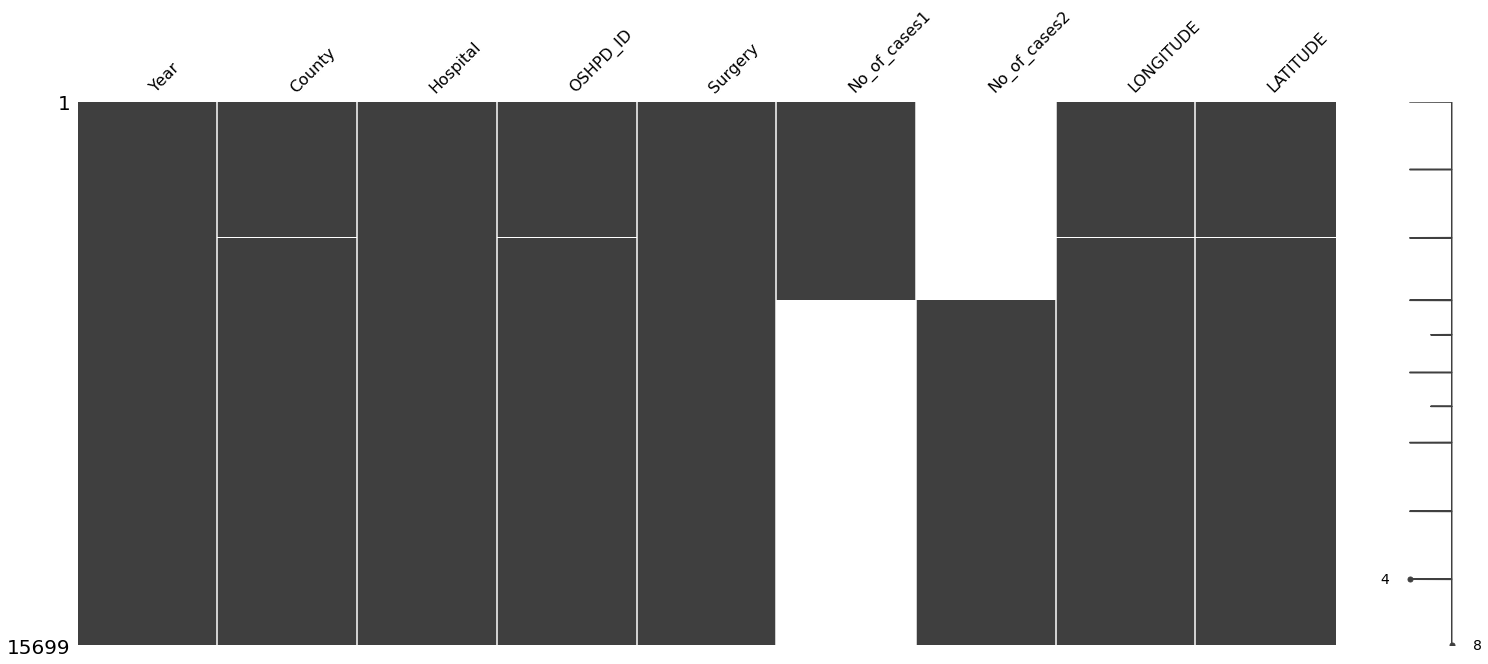

In [13]:
import missingno as mn
mn.matrix(data)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight1: We have equal numbers(88) that are missing in the ["County"] and ["OSHPD_ID"] columns respectively. Similarly, the ["LONGITUDE"] AND ["LATITUDE"] columns have the same values(95) that are missing. While for the no of cases columns, we have unequal missing digits.
    
   
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;"> Insight2: When we look closely to the above missing matrix map, we can see that the thin lines drawn on the missing values for the above mentioned columns["County" and "OSHPD_ID"] are on the the same plane, hence each pair of column mentioned above are linearly correlated.

   
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight3: For the number of cases 1 and 2 columnns, we can see that both columns are inversely related, so therefore we               can conclude that when a particular value is given in case 1, then case 2 value will be missing and vuce versa.

    
   
</p>
</div>

WE CAN SEE THAT THE COLUMNS COUNTY AND OSPHDID HAVE THE SAME MISSING VALUES(88). SIMILARLY, THE COLUMNS FOR LONGITUDE
LATITUDE HAVE SIMILAR TREND(95). LET US SEE IF THERE IS A CORRELATION. Before then, let us fill null data.

In [14]:
#fill missing values
data=data.fillna("Empty")
data

,Year,County,Hospital,OSHPD_ID,Surgery,No_of_cases1,No_of_cases2,LONGITUDE,LATITUDE
0,2013,Empty,Statewide,Empty,Colon,7128.0,Empty,Empty,Empty
1,2013,Empty,Statewide,Empty,Bladder,892.0,Empty,Empty,Empty
2,2013,Empty,Statewide,Empty,Rectum,2128.0,Empty,Empty,Empty
3,2013,Empty,Statewide,Empty,Breast,25829.0,Empty,Empty,Empty
4,2013,Empty,Statewide,Empty,Brain,2719.0,Empty,Empty,Empty
...,...,...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,106580996.0,Rectum,Empty,6.0,-121.593602,39.138805
15695,2020,Yuba,Adventist Health and Rideout,106580996.0,Prostate,Empty,5.0,-121.593602,39.138805
15696,2020,Yuba,Adventist Health and Rideout,106580996.0,Lung,Empty,8.0,-121.593602,39.138805
15697,2020,Yuba,Adventist Health and Rideout,106580996.0,Colon,Empty,20.0,-121.593602,39.138805


In [15]:
data

,Year,County,Hospital,OSHPD_ID,Surgery,No_of_cases1,No_of_cases2,LONGITUDE,LATITUDE
0,2013,Empty,Statewide,Empty,Colon,7128.0,Empty,Empty,Empty
1,2013,Empty,Statewide,Empty,Bladder,892.0,Empty,Empty,Empty
2,2013,Empty,Statewide,Empty,Rectum,2128.0,Empty,Empty,Empty
3,2013,Empty,Statewide,Empty,Breast,25829.0,Empty,Empty,Empty
4,2013,Empty,Statewide,Empty,Brain,2719.0,Empty,Empty,Empty
...,...,...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,106580996.0,Rectum,Empty,6.0,-121.593602,39.138805
15695,2020,Yuba,Adventist Health and Rideout,106580996.0,Prostate,Empty,5.0,-121.593602,39.138805
15696,2020,Yuba,Adventist Health and Rideout,106580996.0,Lung,Empty,8.0,-121.593602,39.138805
15697,2020,Yuba,Adventist Health and Rideout,106580996.0,Colon,Empty,20.0,-121.593602,39.138805


[]

<Figure size 1080x720 with 0 Axes>

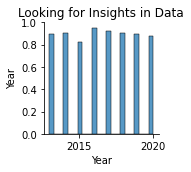

In [16]:
"""
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. 
This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots 
and the diagonal plots are the univariate plots
""" 
plt.figure(figsize=(15,10))
sns.pairplot(data)
plt.title("Looking for Insights in Data")
plt.tight_layout()
plt.plot()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: We can see that that for the x column(Year) the number of cases for 1 and 2 are similar. The cases are more distributed below 10000, with the high number of cases being far from this point.
Insight: The longitude and latitude sections are inversely proportion, this implies that the entries for these columns were correct.

    
   
</p>
</div>






In [17]:
# We do not need some columns
data=data.drop(["LONGITUDE", "LATITUDE"], axis=1)
data

,Year,County,Hospital,OSHPD_ID,Surgery,No_of_cases1,No_of_cases2
0,2013,Empty,Statewide,Empty,Colon,7128.0,Empty
1,2013,Empty,Statewide,Empty,Bladder,892.0,Empty
2,2013,Empty,Statewide,Empty,Rectum,2128.0,Empty
3,2013,Empty,Statewide,Empty,Breast,25829.0,Empty
4,2013,Empty,Statewide,Empty,Brain,2719.0,Empty
...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,106580996.0,Rectum,Empty,6.0
15695,2020,Yuba,Adventist Health and Rideout,106580996.0,Prostate,Empty,5.0
15696,2020,Yuba,Adventist Health and Rideout,106580996.0,Lung,Empty,8.0
15697,2020,Yuba,Adventist Health and Rideout,106580996.0,Colon,Empty,20.0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: 
from the above output, it seems like the ["Hospital"] titled "Statewide" corresponds to empty cells in the ["County"]'s column. Let us confirm to be sure.
</p>
</div>




In [18]:
# Check if statewide hospital==empty in the county column
check1=data[((data["Hospital"]=="Statewide")&(data["County"]=="Empty"))]
print("The shape of empty cells in county column",check1.shape)
check2=data[((data["County"]=="Empty") & (data["OSHPD_ID"]=="Empty"))]
print("The shape of Hospital named Statewide: ",check2.shape)

The shape of empty cells in county column (88, 7)
The shape of Hospital named Statewide:  (88, 7)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: The assumption is confirmed, so we actually do not know which country and ID #(OSHPD_ID) Statewide hospital
belongs to, we can call the unknown 
country "state" and generate a unique id(OSHPDID) from the mean of other countries ID



</p>
</div>



.

In [19]:
data["County"]=data["County"].replace(to_replace=["Empty"],value= "State")
data["OSHPD_ID"]=data["OSHPD_ID"].replace(to_replace=["Empty"],value= 0)
data



,Year,County,Hospital,OSHPD_ID,Surgery,No_of_cases1,No_of_cases2
0,2013,State,Statewide,0.0,Colon,7128.0,Empty
1,2013,State,Statewide,0.0,Bladder,892.0,Empty
2,2013,State,Statewide,0.0,Rectum,2128.0,Empty
3,2013,State,Statewide,0.0,Breast,25829.0,Empty
4,2013,State,Statewide,0.0,Brain,2719.0,Empty
...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,106580996.0,Rectum,Empty,6.0
15695,2020,Yuba,Adventist Health and Rideout,106580996.0,Prostate,Empty,5.0
15696,2020,Yuba,Adventist Health and Rideout,106580996.0,Lung,Empty,8.0
15697,2020,Yuba,Adventist Health and Rideout,106580996.0,Colon,Empty,20.0


In [20]:
#taking the mean of OSHPDID as the new ID for the Statewide Hospital
IDmean=data["OSHPD_ID"].mean()
IDmean=round(IDmean)
IDmean

105687003

In [21]:
# replacing 
data["OSHPDID"]=data["OSHPD_ID"].replace(to_replace=[0],value= IDmean)
data

,Year,County,Hospital,OSHPD_ID,Surgery,No_of_cases1,No_of_cases2,OSHPDID
0,2013,State,Statewide,0.0,Colon,7128.0,Empty,105687003.0
1,2013,State,Statewide,0.0,Bladder,892.0,Empty,105687003.0
2,2013,State,Statewide,0.0,Rectum,2128.0,Empty,105687003.0
3,2013,State,Statewide,0.0,Breast,25829.0,Empty,105687003.0
4,2013,State,Statewide,0.0,Brain,2719.0,Empty,105687003.0
...,...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,106580996.0,Rectum,Empty,6.0,106580996.0
15695,2020,Yuba,Adventist Health and Rideout,106580996.0,Prostate,Empty,5.0,106580996.0
15696,2020,Yuba,Adventist Health and Rideout,106580996.0,Lung,Empty,8.0,106580996.0
15697,2020,Yuba,Adventist Health and Rideout,106580996.0,Colon,Empty,20.0,106580996.0


In [22]:
print(data["OSHPD_ID"].nunique())
print(data["Hospital"].nunique())


333
383


In [23]:
data=data.drop(["OSHPD_ID"], axis="columns")
data

,Year,County,Hospital,Surgery,No_of_cases1,No_of_cases2,OSHPDID
0,2013,State,Statewide,Colon,7128.0,Empty,105687003.0
1,2013,State,Statewide,Bladder,892.0,Empty,105687003.0
2,2013,State,Statewide,Rectum,2128.0,Empty,105687003.0
3,2013,State,Statewide,Breast,25829.0,Empty,105687003.0
4,2013,State,Statewide,Brain,2719.0,Empty,105687003.0
...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,Rectum,Empty,6.0,106580996.0
15695,2020,Yuba,Adventist Health and Rideout,Prostate,Empty,5.0,106580996.0
15696,2020,Yuba,Adventist Health and Rideout,Lung,Empty,8.0,106580996.0
15697,2020,Yuba,Adventist Health and Rideout,Colon,Empty,20.0,106580996.0


# explore the no_of_cases, and check for correlation

In [24]:
data["No_of_cases1"]=data["No_of_cases1"].replace(to_replace=["Empty"],value= 0)
data["No_of_cases2"]=data["No_of_cases2"].replace(to_replace=["Empty"],value= 0)
data

,Year,County,Hospital,Surgery,No_of_cases1,No_of_cases2,OSHPDID
0,2013,State,Statewide,Colon,7128.0,0.0,105687003.0
1,2013,State,Statewide,Bladder,892.0,0.0,105687003.0
2,2013,State,Statewide,Rectum,2128.0,0.0,105687003.0
3,2013,State,Statewide,Breast,25829.0,0.0,105687003.0
4,2013,State,Statewide,Brain,2719.0,0.0,105687003.0
...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,Rectum,0.0,6.0,106580996.0
15695,2020,Yuba,Adventist Health and Rideout,Prostate,0.0,5.0,106580996.0
15696,2020,Yuba,Adventist Health and Rideout,Lung,0.0,8.0,106580996.0
15697,2020,Yuba,Adventist Health and Rideout,Colon,0.0,20.0,106580996.0


In [25]:
print("This is the shape of case1 column : ", data["No_of_cases1"].shape)
print("This is the shape of case2 column : ", data["No_of_cases2"].shape)


This is the shape of case1 column :  (15699,)
This is the shape of case2 column :  (15699,)


In [26]:
# we can create a series that from the size above. After creating that, we use it to plot our scatter plots
series=pd.Series(range(15699))
series

0            0
1            1
2            2
3            3
4            4
         ...  
15694    15694
15695    15695
15696    15696
15697    15697
15698    15698
Length: 15699, dtype: int64

 <h1 style="color:blue"; font-size:100%">INSPECT DATA:</h1> 
    
 <h2 style="color:blue; font-size:150%">We create and join two scattered plots for the numbers of case 1 and 2 using the series(having a range 15699) we created above :</h2>

Text(0, 0.5, 'No of Cases(1 & 2)')

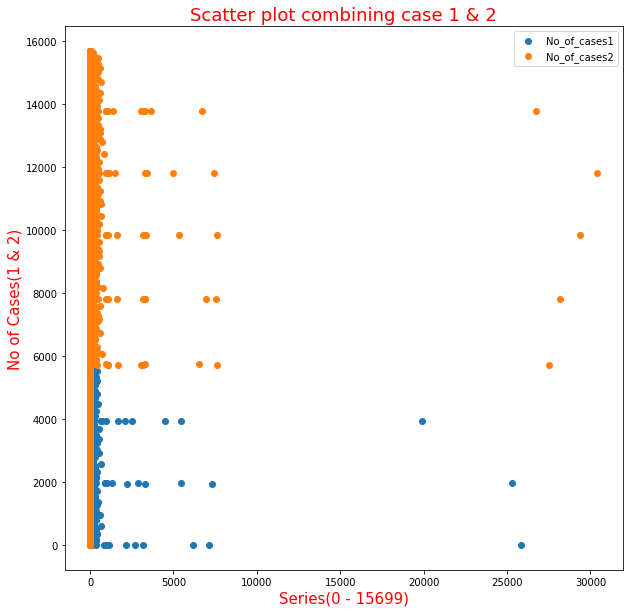

In [27]:
fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(data["No_of_cases1"], series, label="No_of_cases1")
ax1.scatter(data["No_of_cases2"], series, label="No_of_cases2")
plt.title("Scatter plot combining case 1 & 2", fontsize=18, color="red")
plt.legend()
plt.xlabel("Series(0 - 15699)", color="red", fontsize=15)
plt.ylabel("No of Cases(1 & 2)", color="red", fontsize=15)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: Most of the values are densely concentrated at 0(because, when a value is filled in case1, case2 is omitted and vice versa). Secondly, most values filled  were in column case2. And lastly, the values are roughly concentrated between 0 to 75000. 
</p>
</div>


In [28]:
#Check for correllation
check=data[((data["No_of_cases1"]=="Empty") & (data["No_of_cases2"]=="Empty"))]
print("The shape of the data is: ", check.shape)
col1, col2=data["No_of_cases1"], data["No_of_cases2"]
col=col1.corr(col2)
print("The correlation is: " , col, "\n and we can see we have no correlation ")



The shape of the data is:  (0, 7)
The correlation is:  -0.003298354393237935 
 and we can see we have no correlation 


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: 
we can see that there is no instance where we had both columns for cases empty. Therefore, we will form a new column that will join columns for case1 and case2 and deleting the cells 0 values. We use the mask() function to achieve this
</p>
</div>


In [29]:
# Using mask()
data["No_of_cases1"].mask(data["No_of_cases1"]==0, data["No_of_cases2"], inplace=True)
data

,Year,County,Hospital,Surgery,No_of_cases1,No_of_cases2,OSHPDID
0,2013,State,Statewide,Colon,7128.0,0.0,105687003.0
1,2013,State,Statewide,Bladder,892.0,0.0,105687003.0
2,2013,State,Statewide,Rectum,2128.0,0.0,105687003.0
3,2013,State,Statewide,Breast,25829.0,0.0,105687003.0
4,2013,State,Statewide,Brain,2719.0,0.0,105687003.0
...,...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,Rectum,6.0,6.0,106580996.0
15695,2020,Yuba,Adventist Health and Rideout,Prostate,5.0,5.0,106580996.0
15696,2020,Yuba,Adventist Health and Rideout,Lung,8.0,8.0,106580996.0
15697,2020,Yuba,Adventist Health and Rideout,Colon,20.0,20.0,106580996.0


In [30]:
# ["No_of_cases1"] is filled up, so we drop the ["No_of_cases"]
data=data.drop(["No_of_cases2"], axis=1)
data

,Year,County,Hospital,Surgery,No_of_cases1,OSHPDID
0,2013,State,Statewide,Colon,7128.0,105687003.0
1,2013,State,Statewide,Bladder,892.0,105687003.0
2,2013,State,Statewide,Rectum,2128.0,105687003.0
3,2013,State,Statewide,Breast,25829.0,105687003.0
4,2013,State,Statewide,Brain,2719.0,105687003.0
...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,Rectum,6.0,106580996.0
15695,2020,Yuba,Adventist Health and Rideout,Prostate,5.0,106580996.0
15696,2020,Yuba,Adventist Health and Rideout,Lung,8.0,106580996.0
15697,2020,Yuba,Adventist Health and Rideout,Colon,20.0,106580996.0


In [31]:
# recheck for null values
data.isnull().sum()

Year            0
County          0
Hospital        0
Surgery         0
No_of_cases1    0
OSHPDID         0
dtype: int64

<h1 style="color:blue"; font-size:100%">CREATE HEATMAP</h1> 


In [32]:
heatmap1=data.groupby("Surgery").Year.value_counts().unstack()
heatmap1

Year,2013,2014,2015,2016,2017,2018,2019,2020
Surgery,,,,,,,,
Bladder,132,125,102,134,125,117,105,112
Brain,143,139,138,141,135,140,143,135
Breast,292,299,287,286,285,282,282,267
Colon,298,303,286,294,290,288,286,280
Esophagus,83,85,66,88,82,73,84,77
Liver,112,107,93,168,165,153,152,141
Lung,187,194,183,173,167,172,159,154
Pancreas,99,111,95,140,132,120,125,126
Prostate,173,171,149,207,204,196,186,189


In [33]:
#Using plotly to make heatmap
heat=px.imshow(heatmap1, text_auto=True)
heat

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: we can see that Colon and Breast surgeries were more common from 2013 to 2020, while Esophagus is the least.

</div>


<h1 style="color:blue"; font-size:100%">GROUP EACH COLUMN BY NO OF CASES AND VISUALIZE</h1> 

In [34]:
year_group=data.groupby(["Year"]).No_of_cases1.sum()
year_group=pd.DataFrame(year_group.reset_index())
year_group=year_group.sort_values(by=["No_of_cases1"], ascending=[False])
year_group=year_group.reset_index()
year_group.columns=["index", "Year","No_of_cases1"]
year_group=year_group.drop(["index"], axis=1)



county_group=data.groupby(["County"]).No_of_cases1.sum()
county_group=pd.DataFrame(county_group.reset_index())
county_group=county_group.sort_values(by=["No_of_cases1"], ascending=[False])
county_group=county_group.reset_index()
county_group.columns=["index", "Country","No_of_cases1"]
county_group=county_group.drop(["index"], axis=1)


hospital_group=data.groupby(["Hospital"]).No_of_cases1.sum()
hospital_group=pd.DataFrame(hospital_group.reset_index())
hospital_group=hospital_group.sort_values(by=["No_of_cases1"], ascending=[False])
hospital_group=hospital_group.reset_index()
hospital_group.columns=["index", "Hospital","No_of_cases1"]
hospital_group=hospital_group.drop(["index"], axis=1)



surgery_group=data.groupby(["Surgery"]).No_of_cases1.sum()
surgery_group=pd.DataFrame(surgery_group.reset_index())
surgery_group=surgery_group.sort_values(by=["No_of_cases1"], ascending=[False])
surgery_group=surgery_group.reset_index()
surgery_group.columns=["index", "Surgery","No_of_cases1"]
surgery_group=surgery_group.drop(["index"], axis=1)



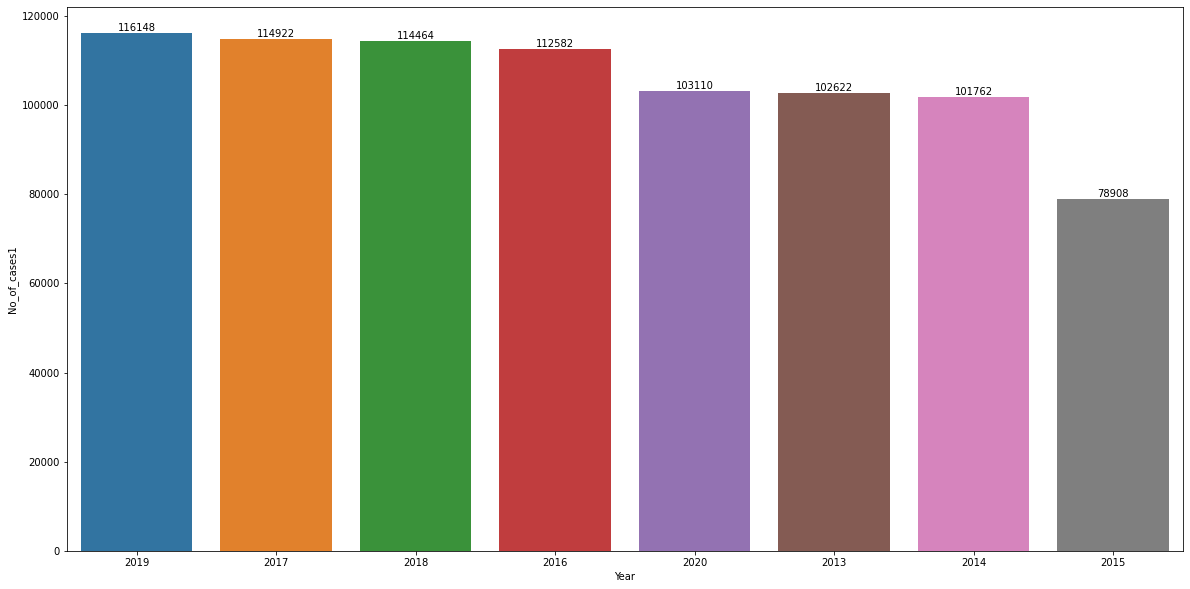

In [35]:
fig=plt.figure(figsize=(20,10))
Cases=year_group["No_of_cases1"]
Year=year_group["Year"]
ax1=sns.barplot(x=Year, y=Cases, data=year_group, order=Year)
ax1.bar_label(ax1.containers[0]);




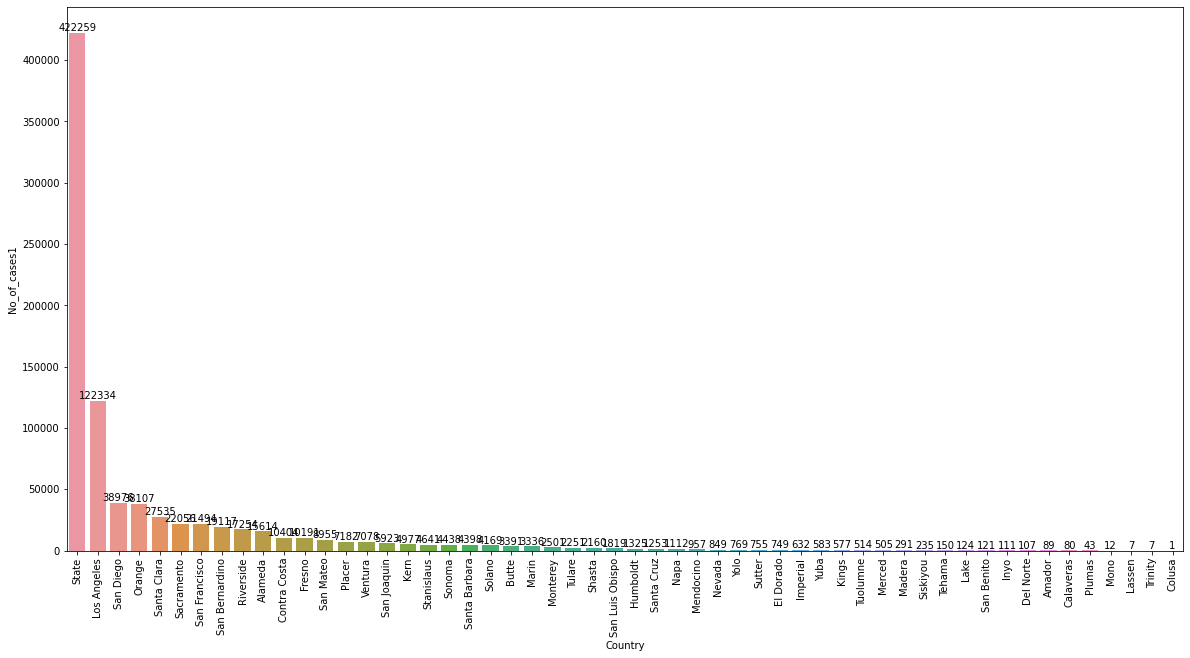

In [36]:
fig=plt.figure(figsize=(20,10))
Cases=county_group["No_of_cases1"]
County=county_group["Country"]
ax=sns.barplot(x=County, y=Cases, data=year_group)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">    Insight: We can see that the county(province) that was empty at the beginning of this notebook which we replaced as "state" has the highest value of surgeries, followed by Los Angeles. On the other hand, Colusa has the mininum with a value of just 1.

</div>


</div>


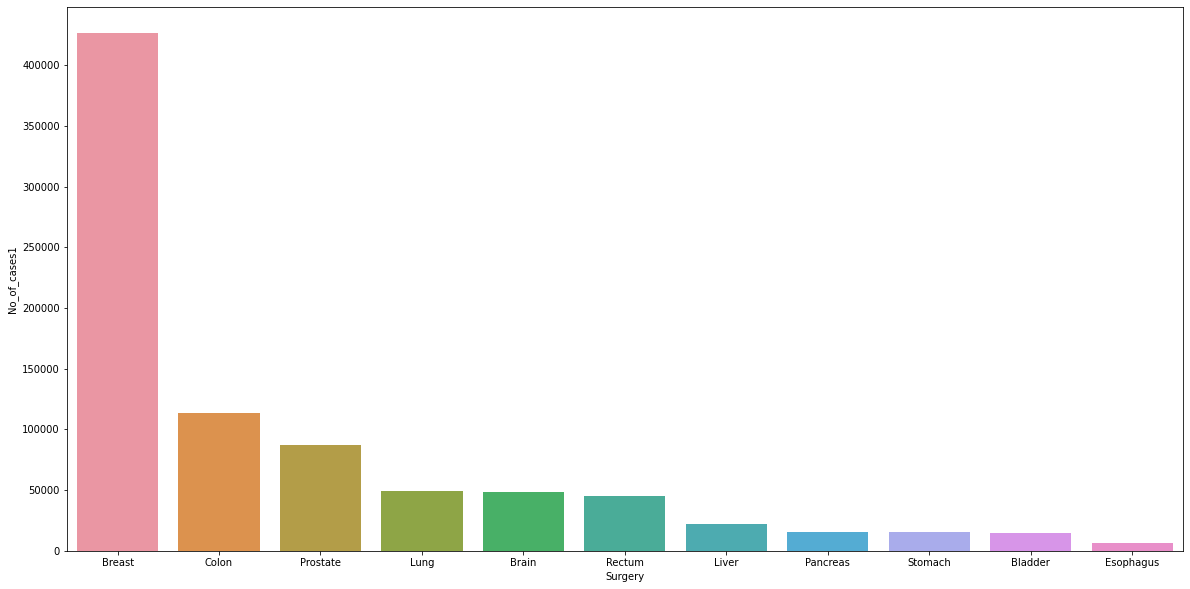

In [37]:
fig=plt.figure(figsize=(20,10))
Cases=surgery_group["No_of_cases1"]
Surgery=surgery_group["Surgery"]
ax=sns.barplot(x=Surgery, y=Cases, data=year_group)





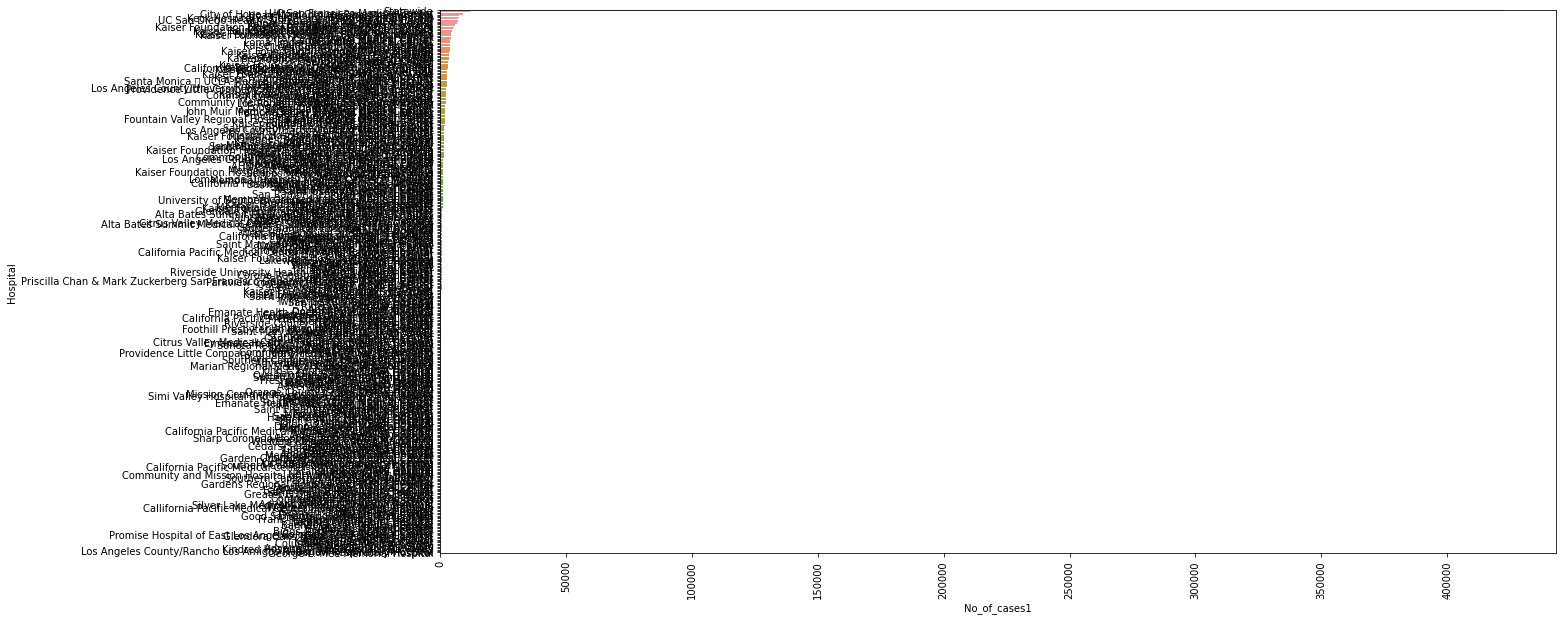

In [38]:

fig=plt.figure(figsize=(20,10))
Cases=hospital_group["No_of_cases1"]
Hospital=hospital_group["Hospital"]
ax=sns.barplot(y=Hospital, x=Cases, data=year_group)
plt.xticks(rotation=90, fontsize=10)

plt.show()



In [39]:
# The data from the hospital column above is too noisy, we can choose the first ten hospitals with the higest number of cases

hospital_group_10=hospital_group.head(10)
hospital_group_10

,Hospital,No_of_cases1
0,Statewide,422259.0
1,UC San Francisco Medical Center,11814.0
2,City of Hope Helford Clinical Research Hospital,8961.0
3,Hoag Memorial Hospital Presbyterian,8937.0
4,Stanford Health Care,7501.0
5,Keck Hospital of University of Southern Califo...,7293.0
6,UC San Diego Health System  Hillcrest Medical...,7089.0
7,Cedars Sinai Medical Center,7075.0
8,Ronald Reagan UCLA Medical Center,6871.0
9,Kaiser Foundation Hospital  Fontana,6758.0


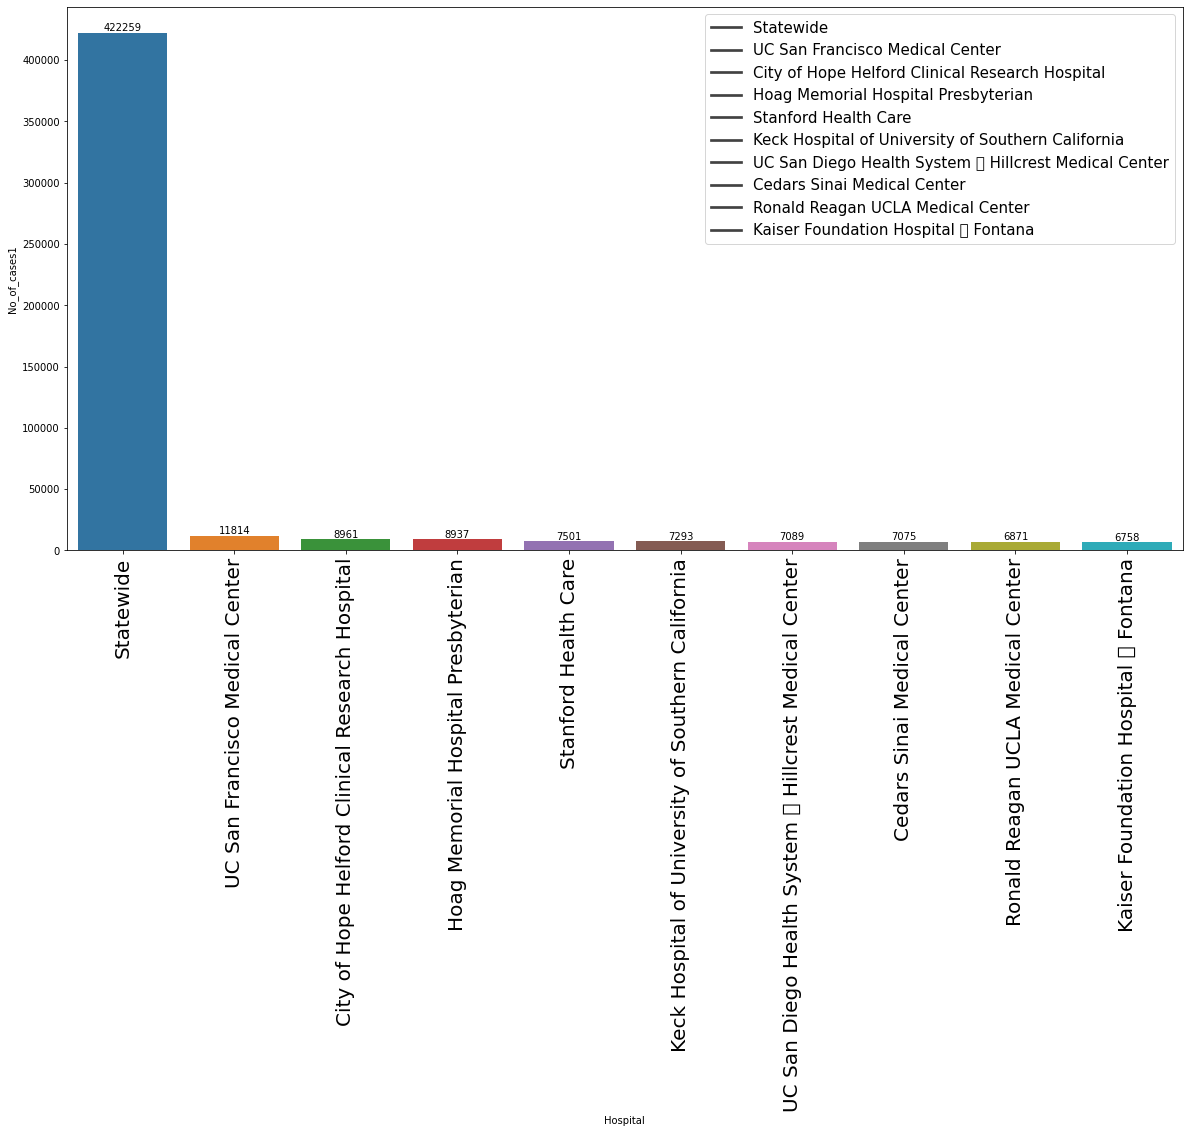

In [40]:

fig=plt.figure(figsize=(20,10))
Cases=hospital_group_10["No_of_cases1"]
Hospital=hospital_group_10["Hospital"]
ax=sns.barplot(x=Hospital, y=Cases, data=hospital_group_10)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90, fontsize=20)
plt.legend(Hospital, fontsize=15 )
plt.show()

<AxesSubplot:xlabel='Year', ylabel='No_of_cases1'>

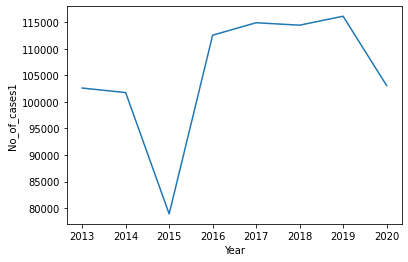

In [41]:
# Check the trend over the years
x=year_group["Year"]
y=year_group["No_of_cases1"]
sns.lineplot(data=year_group,x=x, y=y)

In [42]:
# our final cleaned dataset is presented below
data

,Year,County,Hospital,Surgery,No_of_cases1,OSHPDID
0,2013,State,Statewide,Colon,7128.0,105687003.0
1,2013,State,Statewide,Bladder,892.0,105687003.0
2,2013,State,Statewide,Rectum,2128.0,105687003.0
3,2013,State,Statewide,Breast,25829.0,105687003.0
4,2013,State,Statewide,Brain,2719.0,105687003.0
...,...,...,...,...,...,...
15694,2020,Yuba,Adventist Health and Rideout,Rectum,6.0,106580996.0
15695,2020,Yuba,Adventist Health and Rideout,Prostate,5.0,106580996.0
15696,2020,Yuba,Adventist Health and Rideout,Lung,8.0,106580996.0
15697,2020,Yuba,Adventist Health and Rideout,Colon,20.0,106580996.0
